### Problema 1.

Min Z=$4x_1 + x_2$  
s.a.   
$3x_1 + x_2 = 3$  
$4x_1 + 3x_2 \geq 6$  
$x_1 + 2x_2 \leq 4$

$x_1$, $x_2 \geq 0$


In [181]:
#Importamos Scipy 
import numpy as np
from scipy.optimize import linprog
#Importamos matplotlib para el método gráfico
import matplotlib.pyplot as plt
%matplotlib inline


In [182]:
# Definimos los coeficientes de la función objetivo
c = [4, 1]  # Minimizar z = 4x_1 + x_2 (ya que es minimizacion dejamos los coeficientes como se encuentran)

In [183]:
# Definimos los coeficientes de las restricciones de desigualdad: 
A = [[-4, -3], [1, 2]]  # Convertimos 4x_1 + 3x_2 >= 6 a -4x_1 - 3x_2 <= -6 ,  x_1 + 2x_2 <= 4
b = [-6, 4] #Coeficientes del lado derecho de las restricciones 

In [184]:
# Coeficientes de la restricción de igualdad:
A_eq = [[3, 1]]  # 3x_1 + x_2 = 3
b_eq = [3]

In [185]:
# Restricciones de no negatividad para las variables x_1, x_2 
x_bounds = (0, None)
bounds = [x_bounds, x_bounds]

In [186]:
# Resolver el problema con linprog 
result = linprog(c, A_ub=A, b_ub=b, A_eq=A_eq, b_eq=b_eq, bounds=bounds, method='highs')

In [187]:
#Mostramos el resultado en cualquier caso que exista o no una solucion factible: 
if result.success:
    print("Solución encontrada:")
    print("Valores de las variables:", result.x)
    print("Valor óptimo de la función objetivo:", result.fun)
else:
    print("No se encontró una solución óptima.")

Solución encontrada:
Valores de las variables: [0.4 1.8]
Valor óptimo de la función objetivo: 3.4000000000000004


## Comprobando el resultado con el método gráfico 

Tenemos de la primer restricción: 

$3x_{1} + x_{2} = 3$

Entonces: 

Si $x_{1} = 0 \longrightarrow x_{2} = 3  \longrightarrow (0,3)$

Si $x_{2} = 0 \longrightarrow x_{1} = 1 \longrightarrow (1,0)$

Ahora graficando $4x_{1} + 2x_{2} = 80$

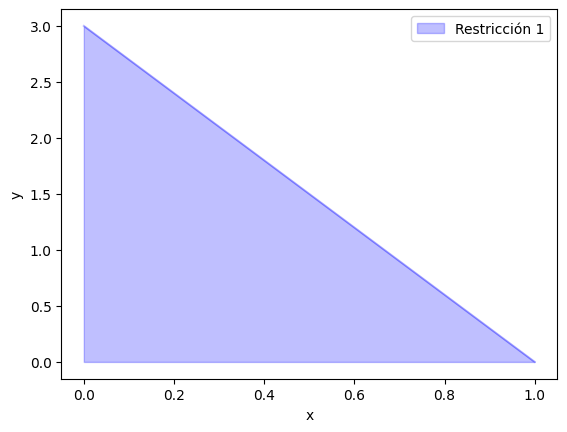

In [188]:
plt.figure()
    
# Restricción para fabricación 
plt.plot([1,0], [0, 3], color='blue', alpha=0.25) #Crea la grafica de 3x_{1} + x_{2} = 3
plt.fill_between([1,0], [0, 3], color='blue', alpha=0.25, label='Restricción 1') #Sombrea el area factible 

#Etiquetas de los ejes 
plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.show()

Tenemos de la primer restricción: 

$4x_{1} + 3x_{2} = 6$

Entonces: 

Si $x_{1} = 0 \longrightarrow x_{2} = 2  \longrightarrow (0,2)$

Si $x_{2} = 0 \longrightarrow x_{1} = \frac{6}{4} \longrightarrow (\frac{6}{4},0)$

Ahora graficando $4x_{1} + 2x_{2} = 80$

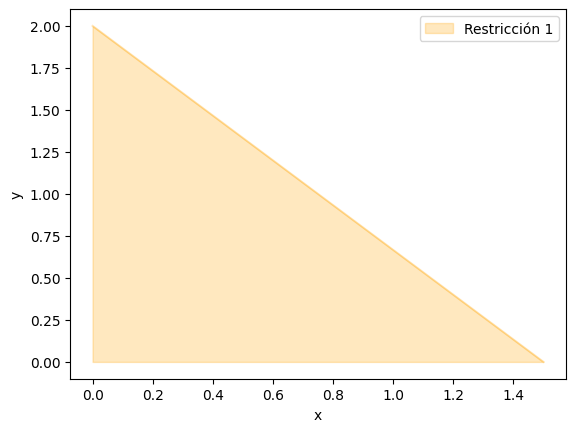

In [189]:
plt.figure()

plt.plot([6.0/4.0,0], [0, 2], color='orange', alpha=0.25) #Crea la grafica de 4x_{1} + 3x_{2} = 6
plt.fill_between([6.0/4.0,0], [0, 2], color='orange', alpha=0.25, label='Restricción 1') #Sombrea el area factible 

#Etiquetas de los ejes 
plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.show()

Tenemos de la primer restricción: 

$x_{1} + 2x_{2} = 4$

Entonces: 

Si $x_{1} = 0 \longrightarrow x_{2} = 2  \longrightarrow (0,2)$

Si $x_{2} = 0 \longrightarrow x_{1} = 4 \longrightarrow (4,0)$

Ahora graficando $4x_{1} + 2x_{2} = 80$

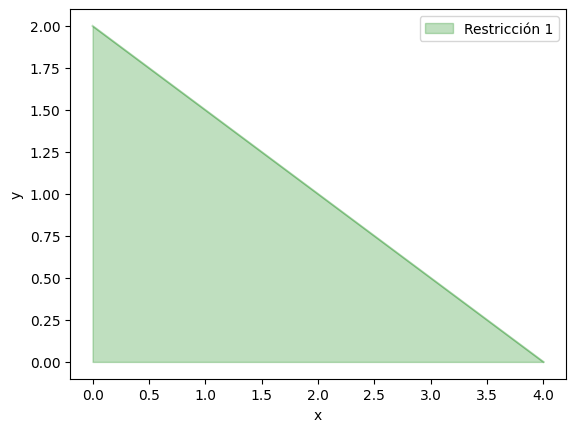

In [190]:
plt.figure()

plt.plot([4.0,0], [0, 2], color='green', alpha=0.25) #Crea la grafica de 4x_{1} + 3x_{2} = 6
plt.fill_between([4.0,0], [0, 2], color='green', alpha=0.25, label='Restricción 1') #Sombrea el area factible 

#Etiquetas de los ejes 
plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.show()

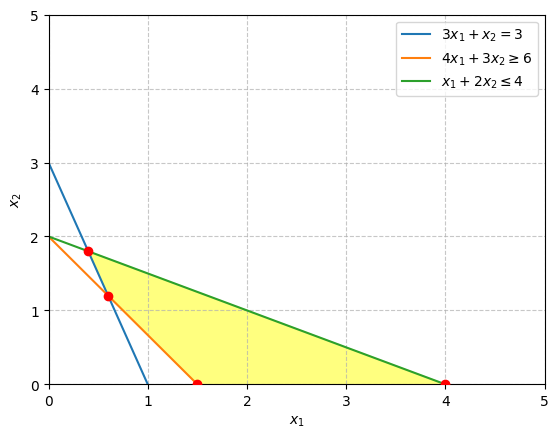

In [191]:
# Definimos los valores de x1
x1 = np.linspace(0, 5, 400)

# Restricciones
recta1 = 3 - 3 * x1            # 3x1 + x2 = 3
recta2 = (6 - 4 * x1) / 3      # 4x1 + 3x2 >= 6 -> y2 = (6 - 4x1) / 3
recta3 = (4 - x1) / 2          # x1 + 2x2 <= 4

# Graficar las líneas de las restricciones
plt.plot(x1, recta1, label=r'$3x_1 + x_2 = 3$')
plt.plot(x1, recta2, label=r'$4x_1 + 3x_2 \geq 6$')
plt.plot(x1, recta3, label=r'$x_1 + 2x_2 \leq 4$')

# Sombrear el área factible
plt.fill_between(x1, np.maximum(recta1, recta2), recta3, where=(recta1 <= recta3) & (recta2 <= recta3), color='yellow', alpha=0.5)

# Encontrar los puntos factibles
x = [1.5, 4, 2/5 , 3/5 ]  
y = [0, 0, 9/5 , 6/5 ]  

# Graficar los puntos factibles
plt.scatter(x, y, color='red', zorder=5)

# Definir el rango y etiquetas
plt.xlim((0, 5))
plt.ylim((0, 5))
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.axhline(0, color='grey', lw=0.5)
plt.axvline(0, color='grey', lw=0.5)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Mostrar la gráfica
plt.show()




De la grafica anterior obtemos los puntos factibles: 

$A=(\frac{3}{2},0)$ ; $B = (4,0)$ . 

Al resolver el sistema formado por la primer y segunda restricciones 
$$
\begin{align}
3{x_1} + x_{2} &= 3 \quad \text{(1)} \\
4x_{1} + 3x_{2} &= 6 \quad \text{(2)}
\end{align}
$$
obtenemos: 
$C = (\frac{3}{5} , \frac{6}{5})$

Al resolver el sistema formado por la primer y tercera restricciones
$$
\begin{align}
3{x_1} + x_{2} &= 3 \quad \text{(1)} \\
x_{1} + 2x_{2} &= 4 \quad \text{(2)}
\end{align}
$$
obtenemos: 
$D = (\frac{2}{5} , \frac{9}{5})$

Al evaluar la funcion objetivo  en cada punto factible : 


En $A=(\frac{3}{2},0)$: $Z^{*} = 6$

En $B = (4,0)$ : $Z^{*} = 16$


En  $C = (\frac{3}{5} , \frac{6}{5})$: $Z^{*} = \frac{18}{5}$


En $D = (\frac{2}{5} , \frac{9}{5})$: $Z^{*} = \frac{17}{5}$

Dado que el problema es minimizar, entonces la solucion optima es: 

$Z^{*} = \frac{17}{5}$, con $X^{*} = (\frac{2}{5} , \frac{9}{5})$, la cual es la misma solucion obtenida por la libreria SciPy. 